## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.286371  0.696551 -0.753648  0.156616  0.595252  0.862934
1 -1.456207  1.247131 -0.915457  1.202248 -0.007649  0.096351
2  1.530781  0.451535  0.993775 -1.106506 -1.806405 -0.771370
3  1.099489 -0.486883 -0.960388 -1.767757  0.295129 -0.161011
4  0.603687  0.852532  0.363312  0.166239  0.164302  0.646086


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9861484	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9761073	total: 70ms	remaining: 34.9s
2:	learn: 0.9667405	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9580330	total: 71ms	remaining: 17.7s
4:	learn: 0.9505066	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9416332	total: 72.3ms	remaining: 12s
6:	learn: 0.9308496	total: 72.8ms	remaining: 10.3s
7:	learn: 0.9228184	total: 73.3ms	remaining: 9.09s
8:	learn: 0.9148040	total: 73.9ms	remaining: 8.13s
9:	learn: 0.9069997	total: 74.5ms	remaining: 7.37s
10:	learn: 0.8985931	total: 75ms	remaining: 6.74s
11:	learn: 0.8896638	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8806818	total: 76ms	remaining: 5.77s
13:	learn: 0.8711528	total: 76.5ms	remaining: 5.38s
14:	learn: 0.8653992	total: 77ms	remaining: 5.05s
15:	learn: 0.8576060	total: 77.5ms	remaining: 4.76s
16:	learn: 0.8499922	total: 77.9ms	remaining: 4.51s
17:	learn: 0.8429289	total: 78.4ms	remaining: 4.28s
18:	learn: 0.8332698	total: 78.9ms	remaining: 4.07s
19:	

84:	learn: 0.4885726	total: 109ms	remaining: 1.17s
85:	learn: 0.4844037	total: 109ms	remaining: 1.16s
86:	learn: 0.4807376	total: 110ms	remaining: 1.15s
87:	learn: 0.4767237	total: 110ms	remaining: 1.14s
88:	learn: 0.4729063	total: 111ms	remaining: 1.13s
89:	learn: 0.4693233	total: 111ms	remaining: 1.12s
90:	learn: 0.4654055	total: 112ms	remaining: 1.11s
91:	learn: 0.4621001	total: 112ms	remaining: 1.11s
92:	learn: 0.4585633	total: 113ms	remaining: 1.1s
93:	learn: 0.4548803	total: 113ms	remaining: 1.09s
94:	learn: 0.4514199	total: 113ms	remaining: 1.08s
95:	learn: 0.4479442	total: 114ms	remaining: 1.07s
96:	learn: 0.4452667	total: 114ms	remaining: 1.06s
97:	learn: 0.4425273	total: 114ms	remaining: 1.05s
98:	learn: 0.4389941	total: 115ms	remaining: 1.05s
99:	learn: 0.4362633	total: 115ms	remaining: 1.04s
100:	learn: 0.4331982	total: 116ms	remaining: 1.03s
101:	learn: 0.4304347	total: 116ms	remaining: 1.02s
102:	learn: 0.4273721	total: 117ms	remaining: 1.01s
103:	learn: 0.4242433	total: 

246:	learn: 0.1742987	total: 188ms	remaining: 572ms
247:	learn: 0.1733990	total: 188ms	remaining: 571ms
248:	learn: 0.1724310	total: 189ms	remaining: 569ms
249:	learn: 0.1712757	total: 189ms	remaining: 567ms
250:	learn: 0.1702452	total: 190ms	remaining: 566ms
251:	learn: 0.1694421	total: 190ms	remaining: 564ms
252:	learn: 0.1684134	total: 190ms	remaining: 562ms
253:	learn: 0.1675066	total: 191ms	remaining: 560ms
254:	learn: 0.1663845	total: 191ms	remaining: 558ms
255:	learn: 0.1652792	total: 192ms	remaining: 557ms
256:	learn: 0.1644321	total: 192ms	remaining: 555ms
257:	learn: 0.1629510	total: 193ms	remaining: 554ms
258:	learn: 0.1617541	total: 193ms	remaining: 553ms
259:	learn: 0.1609171	total: 194ms	remaining: 551ms
260:	learn: 0.1597882	total: 194ms	remaining: 549ms
261:	learn: 0.1586718	total: 195ms	remaining: 548ms
262:	learn: 0.1575365	total: 195ms	remaining: 546ms
263:	learn: 0.1564758	total: 196ms	remaining: 545ms
264:	learn: 0.1555168	total: 196ms	remaining: 544ms
265:	learn: 

465:	learn: 0.0519656	total: 293ms	remaining: 335ms
466:	learn: 0.0518908	total: 293ms	remaining: 335ms
467:	learn: 0.0515685	total: 294ms	remaining: 334ms
468:	learn: 0.0512826	total: 294ms	remaining: 333ms
469:	learn: 0.0512094	total: 295ms	remaining: 333ms
470:	learn: 0.0508823	total: 295ms	remaining: 332ms
471:	learn: 0.0508106	total: 296ms	remaining: 331ms
472:	learn: 0.0504914	total: 296ms	remaining: 330ms
473:	learn: 0.0502075	total: 297ms	remaining: 329ms
474:	learn: 0.0499307	total: 297ms	remaining: 329ms
475:	learn: 0.0496499	total: 298ms	remaining: 328ms
476:	learn: 0.0495810	total: 298ms	remaining: 327ms
477:	learn: 0.0492741	total: 299ms	remaining: 326ms
478:	learn: 0.0490853	total: 299ms	remaining: 326ms
479:	learn: 0.0487671	total: 300ms	remaining: 325ms
480:	learn: 0.0484974	total: 300ms	remaining: 324ms
481:	learn: 0.0482353	total: 301ms	remaining: 323ms
482:	learn: 0.0479716	total: 301ms	remaining: 322ms
483:	learn: 0.0477034	total: 302ms	remaining: 321ms
484:	learn: 

629:	learn: 0.0242931	total: 372ms	remaining: 218ms
630:	learn: 0.0241608	total: 372ms	remaining: 218ms
631:	learn: 0.0240441	total: 373ms	remaining: 217ms
632:	learn: 0.0239594	total: 373ms	remaining: 216ms
633:	learn: 0.0238770	total: 374ms	remaining: 216ms
634:	learn: 0.0238032	total: 374ms	remaining: 215ms
635:	learn: 0.0236749	total: 375ms	remaining: 214ms
636:	learn: 0.0235922	total: 375ms	remaining: 214ms
637:	learn: 0.0235126	total: 375ms	remaining: 213ms
638:	learn: 0.0233609	total: 376ms	remaining: 212ms
639:	learn: 0.0232955	total: 377ms	remaining: 212ms
640:	learn: 0.0231583	total: 377ms	remaining: 211ms
641:	learn: 0.0230368	total: 377ms	remaining: 210ms
642:	learn: 0.0229479	total: 378ms	remaining: 210ms
643:	learn: 0.0228782	total: 378ms	remaining: 209ms
644:	learn: 0.0227937	total: 379ms	remaining: 208ms
645:	learn: 0.0226849	total: 379ms	remaining: 208ms
646:	learn: 0.0226095	total: 380ms	remaining: 207ms
647:	learn: 0.0225423	total: 380ms	remaining: 207ms
648:	learn: 

857:	learn: 0.0100010	total: 477ms	remaining: 79ms
858:	learn: 0.0099587	total: 478ms	remaining: 78.4ms
859:	learn: 0.0099431	total: 478ms	remaining: 77.8ms
860:	learn: 0.0098878	total: 479ms	remaining: 77.3ms
861:	learn: 0.0098468	total: 479ms	remaining: 76.7ms
862:	learn: 0.0098152	total: 480ms	remaining: 76.1ms
863:	learn: 0.0097898	total: 480ms	remaining: 75.5ms
864:	learn: 0.0097483	total: 480ms	remaining: 75ms
865:	learn: 0.0097079	total: 481ms	remaining: 74.4ms
866:	learn: 0.0096933	total: 481ms	remaining: 73.8ms
867:	learn: 0.0096789	total: 482ms	remaining: 73.3ms
868:	learn: 0.0096433	total: 482ms	remaining: 72.7ms
869:	learn: 0.0096095	total: 483ms	remaining: 72.1ms
870:	learn: 0.0095849	total: 483ms	remaining: 71.5ms
871:	learn: 0.0095364	total: 484ms	remaining: 71ms
872:	learn: 0.0095124	total: 484ms	remaining: 70.4ms
873:	learn: 0.0094826	total: 484ms	remaining: 69.8ms
874:	learn: 0.0094602	total: 485ms	remaining: 69.3ms
875:	learn: 0.0094382	total: 485ms	remaining: 68.7ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

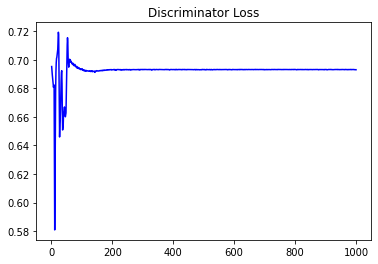

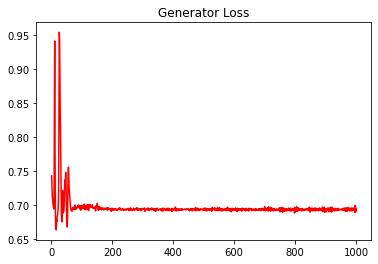

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16105765675387634


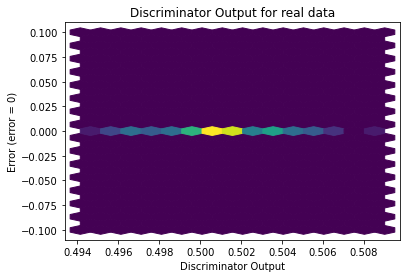

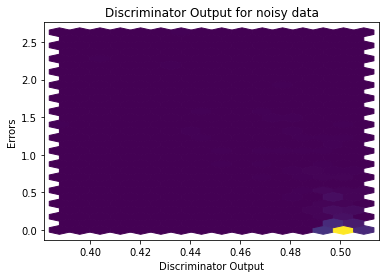

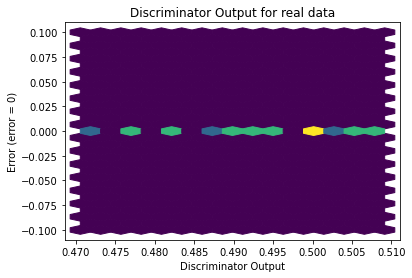

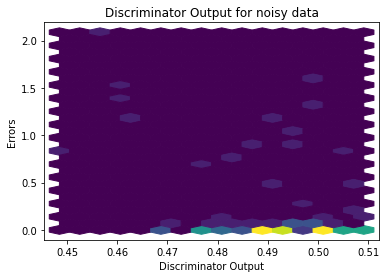

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


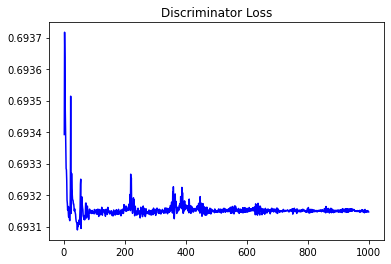

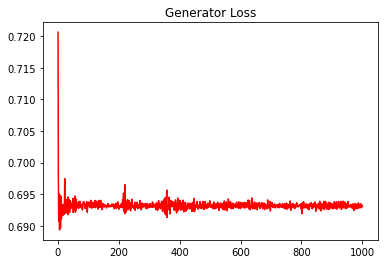

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17144266076709702


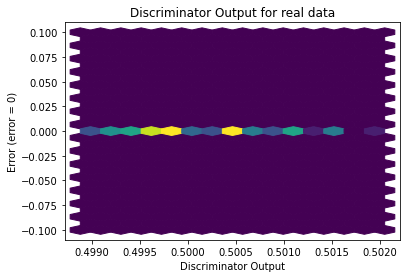

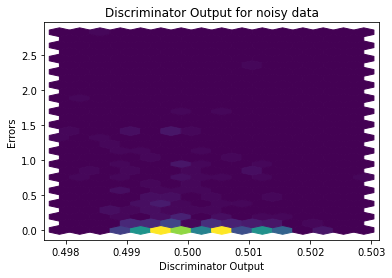

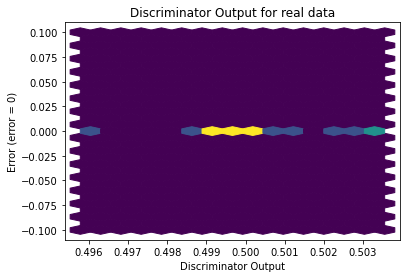

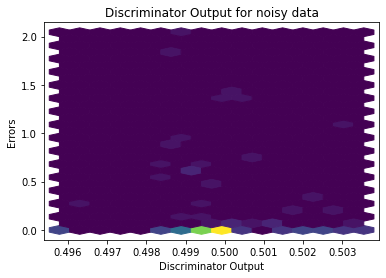

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0197]], requires_grad=True)
